# Contents
01 Importing Libraries
02 Data Cleaning & Processing
03 Utilizing Elbow Technique for Clustering
04 K-means Algorithm
05 Creating Visualizations Using Clusters
06 Visualization Discussion
07 Descriptive Statistics on Clusters

# 01 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Displays visualizations automatically
%matplotlib inline

In [3]:
# path
path = r'C:\Users\ckra9\Documents\CareerFoundry\World Happiness Rankings'

In [4]:
# Importing cleaned data set
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merge_all_years.csv'), index_col = False)

In [5]:
df_happiness.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,158,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,315,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,470,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,626,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


# 02 Data Cleaning & Processing

In [6]:
# Dropping unnamed column
df_happy = df_happiness.drop('Unnamed: 0', axis = 1)

In [7]:
df_happy.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [8]:
df_happy.shape

(782, 12)

In [9]:
# missing values check
df_happy.isnull().sum()

Country                0
Region                 0
Year                   0
Happiness_rank         0
Happiness_score        0
GDP_capita             0
Family                 0
Life_expectancy        0
Freedom                0
Gov_trust              1
Generosity             0
Dystopia_residual    312
dtype: int64

In [10]:
# duplicates check
dups = df_happy.duplicated()

In [11]:
dups.shape

(782,)

In [12]:
# General descriptive statistics
df_happy.describe()

,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720


In [13]:
# Dropping Country, Region, and Dystopia Residual Columns
# Removing Country and Region Columns because they are categorical and can't be used for k-means analysis
# Removing Dystopia Residual Column because it is only recorded for some years and isn't useful for analysis
happy = df_happy.drop(['Country','Region', 'Dystopia_residual'], axis = 1)

In [14]:
happy.head()

,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity
0,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100
1,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680
2,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871
3,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000
4,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000


In [15]:
# inputting mean gov_trust value for NaN value
happy.fillna(0.125436, inplace = True)

In [16]:
# Checking input
happy.isnull().sum()

Year               0
Happiness_rank     0
Happiness_score    0
GDP_capita         0
Family             0
Life_expectancy    0
Freedom            0
Gov_trust          0
Generosity         0
dtype: int64

In [17]:
happy.describe()

,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105749,0.122321
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.155861,0.278832
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


# 03 Utilizing Elbow Technique for Clustering

In [18]:
# Defining the range of clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
# Creates a score that represents the rate of variation for the cluster
score = [kmeans[i].fit(happy).score(happy) for i in range(len(kmeans))] 

score

C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-1597233.753887222,
 -400711.32498913666,
 -179157.21009053043,
 -101576.70147328149,
 -65634.5486959569,
 -46219.238723585666,
 -34388.327968804675,
 -26696.877094147276,
 -21571.312438532645]

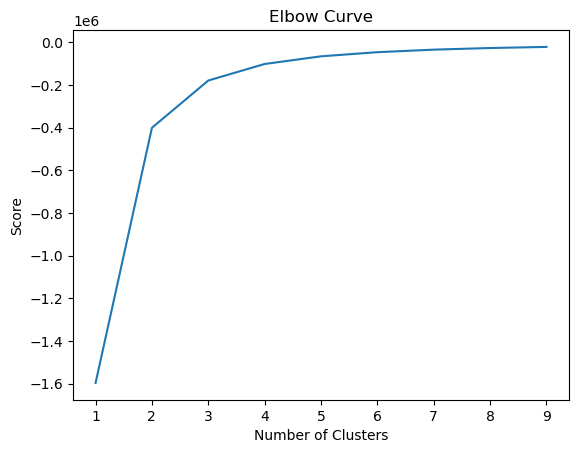

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I am choosing to do 3 clusters for this data because the elbow curve flattens after 3 clusters.

# 04 K-means Algorithm

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [22]:
# Fit the k-means object to the data.

kmeans.fit(happy)

C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
happy['clusters'] = kmeans.fit_predict(happy)

C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ckra9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [24]:
happy.head()

,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,clusters
0,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,0
1,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,0
2,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,0
3,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,0
4,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,0


In [25]:
happy['clusters'].value_counts()

clusters
0    262
2    260
1    260
Name: count, dtype: int64

# 05 Creating Visualizations Using Clusters

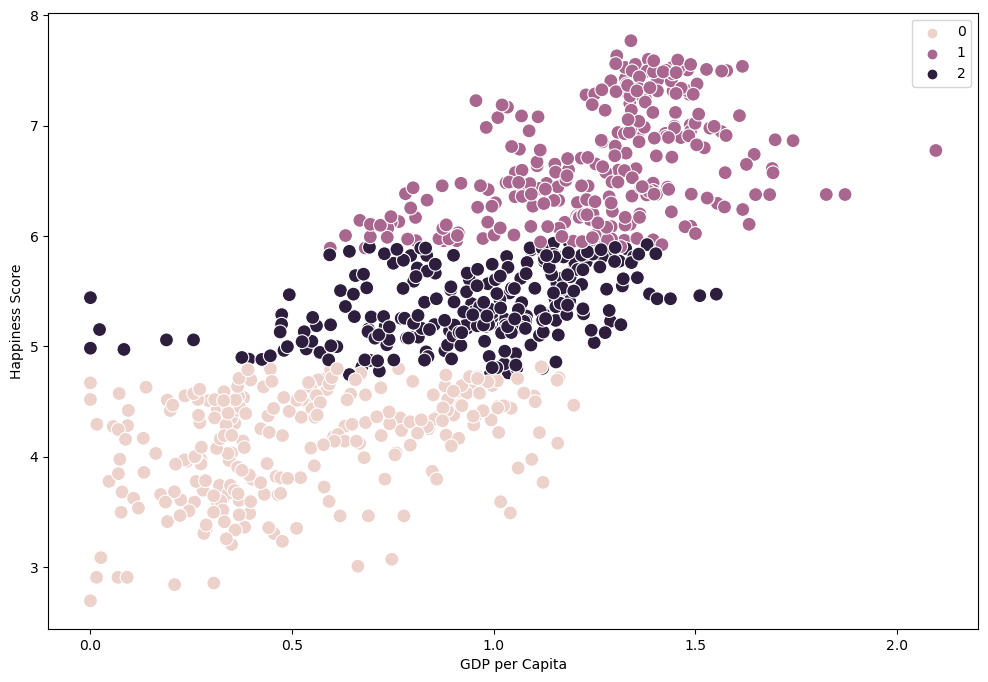

In [26]:
# Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy['GDP_capita'], y=happy['Happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Remove Grid
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

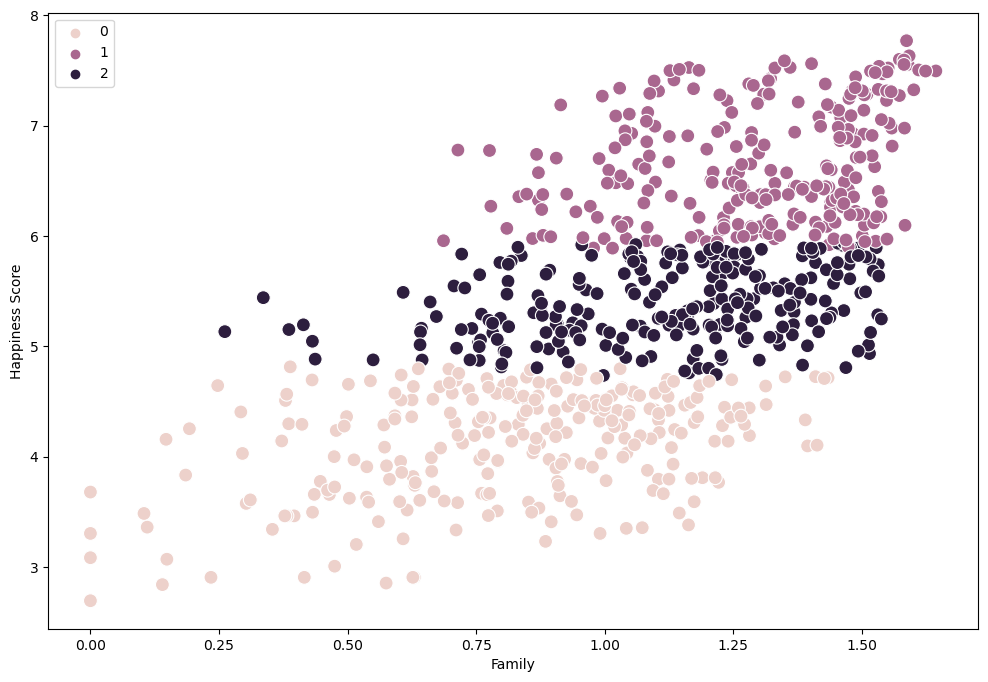

In [27]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy['Family'], y=happy['Happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Remove Grid
plt.xlabel('Family') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

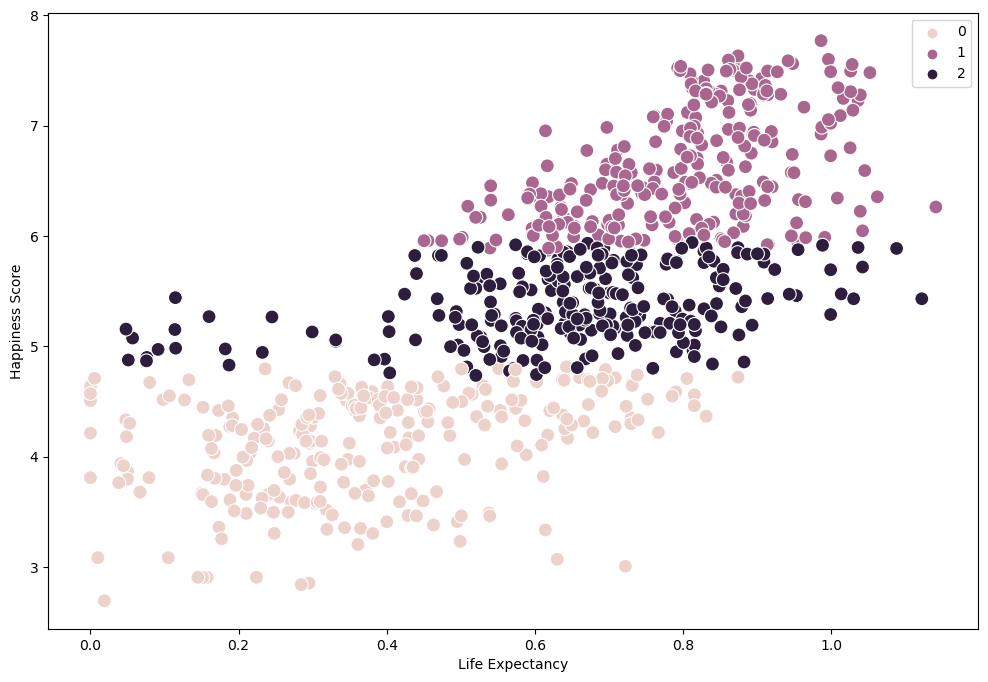

In [28]:
# Plot the clusters for the "Happiness Score" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy['Life_expectancy'], y=happy['Happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Remove Grid
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

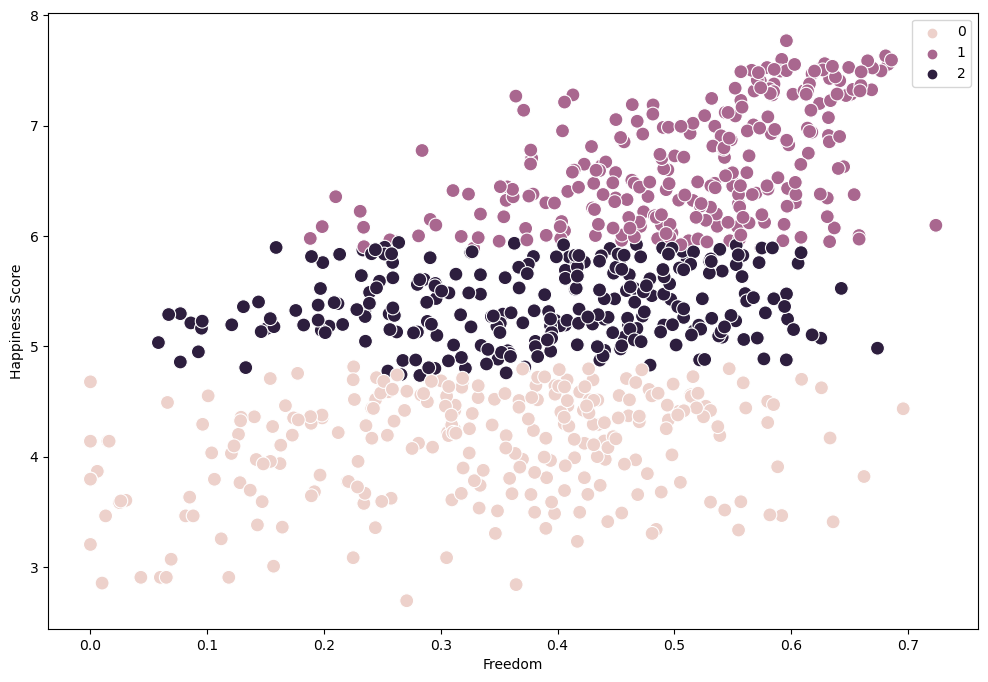

In [29]:
# Plot the clusters for the "Happiness Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy['Freedom'], y=happy['Happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Remove Grid
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

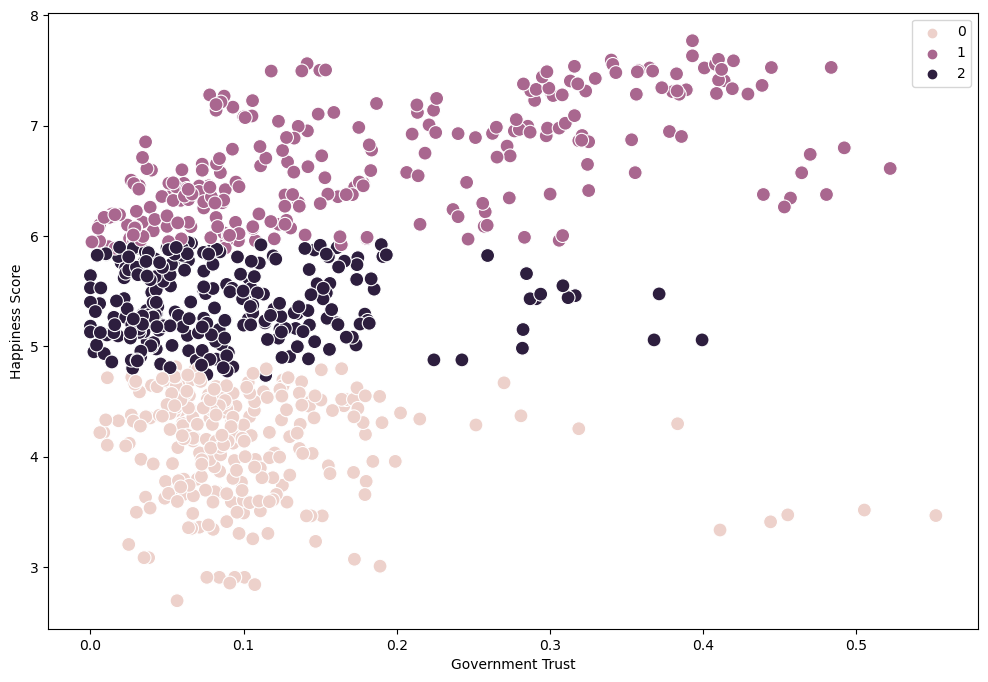

In [30]:
# Plot the clusters for the "Happiness Score" and "Government Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy['Gov_trust'], y=happy['Happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Remove Grid
plt.xlabel('Government Trust') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

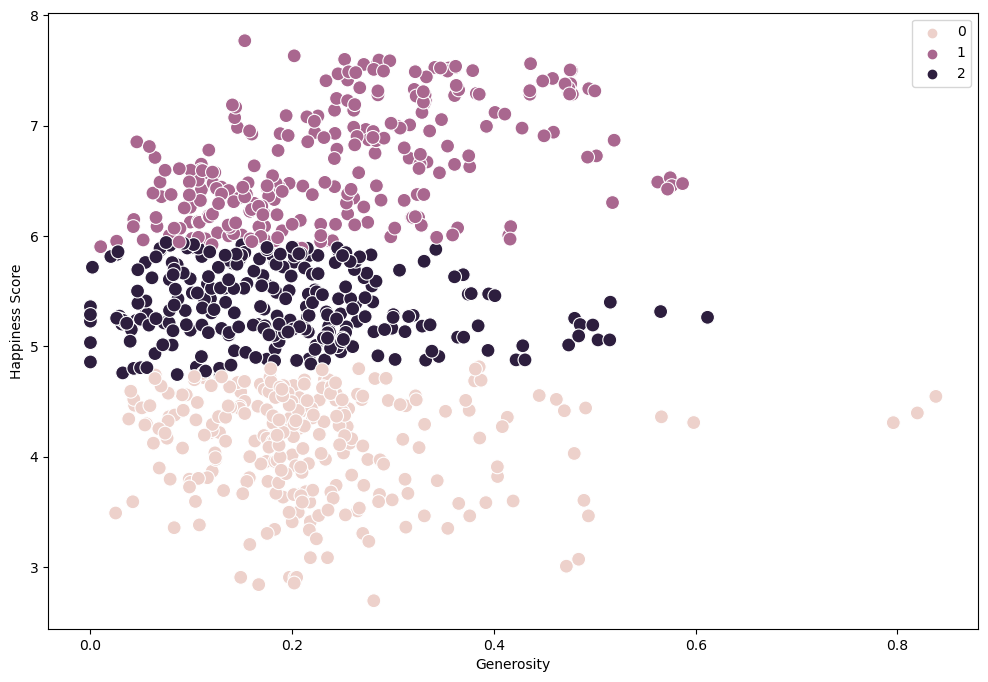

In [31]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy['Generosity'], y=happy['Happiness_score'], hue=kmeans.labels_, s=100) 


ax.grid(False) # Remove Grid
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

# 06 Visualization Discussion

The clusters are useful for clustering high, average, and low happiness scores and the illustrations help show just how much each variable relates to a happiness score. 

# 07 Descriptive Statistics on Clusters

In [32]:
happy.loc[happy['clusters'] == 2, 'cluster'] = 'dark purple'
happy.loc[happy['clusters'] == 1, 'cluster'] = 'purple'
happy.loc[happy['clusters'] == 0, 'cluster'] = 'pink'

In [33]:
happy.groupby('cluster').agg({'Happiness_score':['mean', 'median'], 
                         'GDP_capita':['mean', 'median'], 
                         'Family':['mean', 'median'],
                          'Life_expectancy':['mean', 'median'],
                            'Freedom':['mean', 'median'],
                          'Gov_trust':['mean','median'],
                         'Generosity':['mean', 'median']})

Happiness_score         GDP_capita              Family            \
                       mean  median       mean    median      mean    median   
cluster                                                                        
dark purple        5.374785  5.3235   0.957150  0.996375  1.120393  1.160919   
pink               4.119950  4.2405   0.528382  0.471775  0.817591  0.853755   
purple             6.652004  6.5585   1.265592  1.307820  1.299199  1.323055   

            Life_expectancy             Freedom           Gov_trust            \
                       mean    median      mean    median      mean    median   
cluster                                                                         
dark purple        0.653778  0.661730  0.387908  0.406665  0.089163  0.073173   
pink               0.382232  0.359870  0.331195  0.351794  0.102275  0.085910   
purple             0.803007  0.816044  0.514785  0.536373  0.185048  0.145340   

            Generosity           
                  mean   median  
cluster                          
dark purple   0.189006  0.18000  
pink          0.219468  0.20245  
purple        0.247247  0.24200

These results really help illustrate how each variable contributes to the overall happiness score. For example, the government trust mean goes down from the least happy countries' cluster (dark purple) to the average happy countries' cluster(pink)(from 0.1 to 0.09). However, we can see that it jumps up to 0.18 for the happiest countries. This seems marginal when compared to GDP per Capita. From least happy to most happy countries we see a mean score rising from 0.52 to 0.95 to 1.26. This jump in scores shows that GDP per capita contributes more to a country's overall happiness score than Gov_trust does.
In future analysis these visualizations and aggregations of the clusters will prove valuable in explaining the relationships within the data set. 

In [34]:
# Exporting clustered dataset
happy.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Happiness_clean_clusters.csv'))